                                                Rice Image Classification

In [1]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_path = "C:/Users/USER/Downloads/Rice_Image_Dataset"

In [ ]:
images = []
labels = []

for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)
        


In [4]:
df = pd.DataFrame({'image': images, 'label': labels})

In [5]:
df

,image,label
0,C:/Users/USER/Downloads/Rice_Image_Dataset\Arb...,Arborio
1,C:/Users/USER/Downloads/Rice_Image_Dataset\Arb...,Arborio
2,C:/Users/USER/Downloads/Rice_Image_Dataset\Arb...,Arborio
3,C:/Users/USER/Downloads/Rice_Image_Dataset\Arb...,Arborio
4,C:/Users/USER/Downloads/Rice_Image_Dataset\Arb...,Arborio
...,...,...
74995,C:/Users/USER/Downloads/Rice_Image_Dataset\Kar...,Karacadag
74996,C:/Users/USER/Downloads/Rice_Image_Dataset\Kar...,Karacadag
74997,C:/Users/USER/Downloads/Rice_Image_Dataset\Kar...,Karacadag
74998,C:/Users/USER/Downloads/Rice_Image_Dataset\Kar...,Karacadag


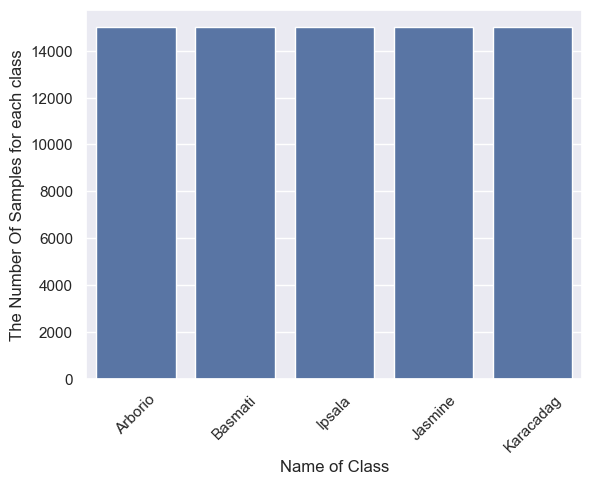

In [6]:
ax = sns.countplot(x=df.label)
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")
plt.xticks(rotation=45)
plt.show()

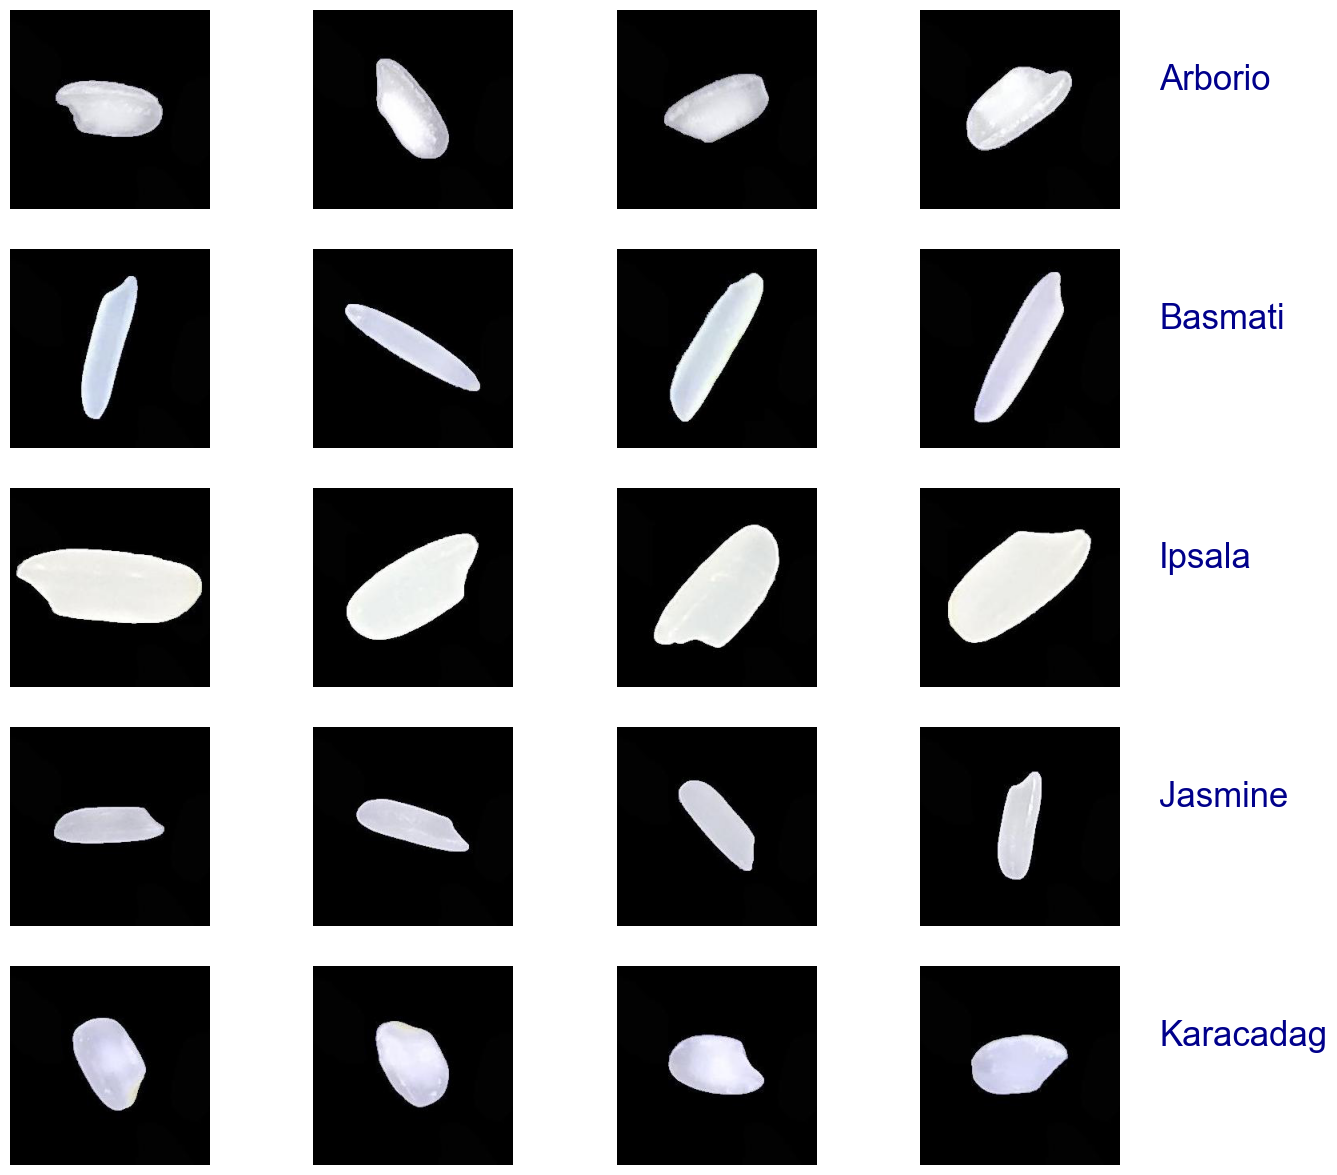

In [7]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)
for i, category in enumerate(df['label'].unique()):
    filepaths = df[df['label'] == category]['image'].values[:4]
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)



In [9]:
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

In [10]:

df_test = pd.DataFrame({'image': X_test, 'label': y_test})


In [11]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (50, 50)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 60000 validated image filenames belonging to 5 classes.


In [16]:
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15000 validated image filenames belonging to 5 classes.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape= (50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True  
)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,  
    validation_steps=test_generator.samples // batch_size,
    epochs=5,
    callbacks=[early_stopping]  
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 297s 157ms/step - accuracy: 0.7446 - loss: 0.6141 - val_accuracy: 0.9491 - val_loss: 0.1461
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 300s 160ms/step - accuracy: 0.9379 - loss: 0.1682 - val_accuracy: 0.9485 - val_loss: 0.1424
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 276s 147ms/step - accuracy: 0.9559 - loss: 0.1247 - val_accuracy: 0.9655 - val_loss: 0.0951
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 252s 134ms/step - accuracy: 0.9648 - loss: 0.0961 - val_accuracy: 0.9613 - val_loss: 0.1134
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 249s 133ms/step - accuracy: 0.9688 - loss: 0.0860 - val_accuracy: 0.9732 - val_loss: 0.0726


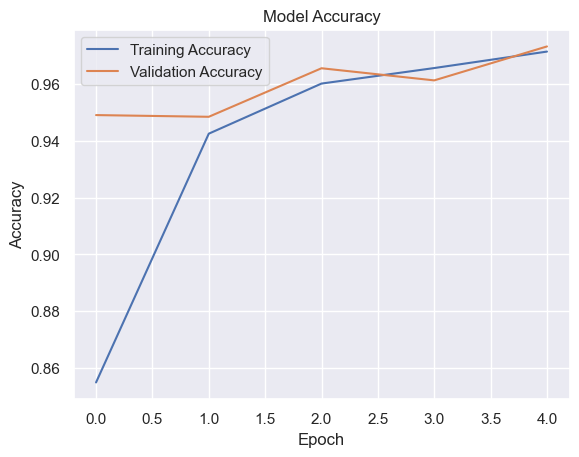

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


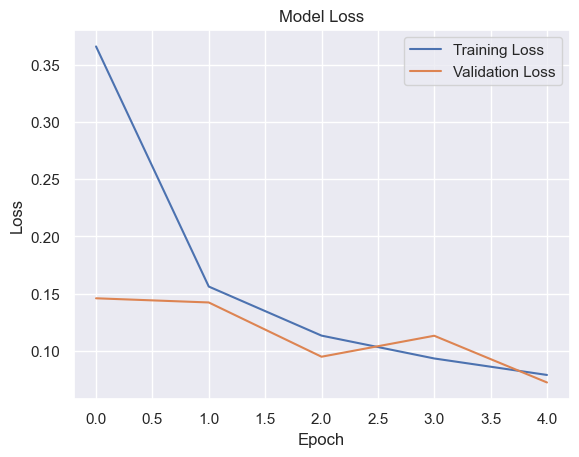

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9776 - loss: 0.0668
Test Loss: 0.06663256138563156
Test Accuracy: 0.9760000109672546


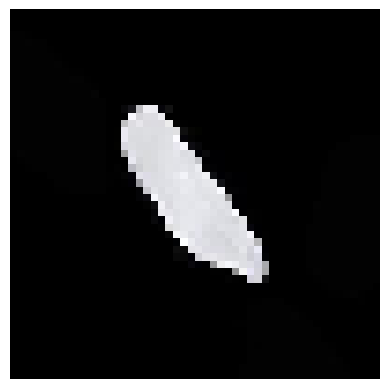

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Our model says it is a: Basmati


In [42]:
from tensorflow.keras.preprocessing import image
idx1 = np.random.randint(0, len(y_test))
img_path = X_test.iloc[idx1]
img = image.load_img(img_path, target_size=(50, 50))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img)
plt.axis('off')
plt.show()
y_pred = model.predict(img_array)
predicted_class_index = np.argmax(y_pred)
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
pred = class_names[predicted_class_index]
print("Our model says it is a:", pred)

In [40]:
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
